In [ ]:
#test two sets of DEGs, secretory epithelial FT vs secretory epithelial endometrium : 600 genes, 

#secretory epithelial FT vs secretory luminal endo and secretory glandular endometrium: 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
from matplotlib import pyplot as plt
import scvelo as scv
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy import io

In [2]:
oviendo = sc.read_h5ad('/home/j87832lw/mounting/oviduct/oviduct.all/alldatasetclustering.h5ad')

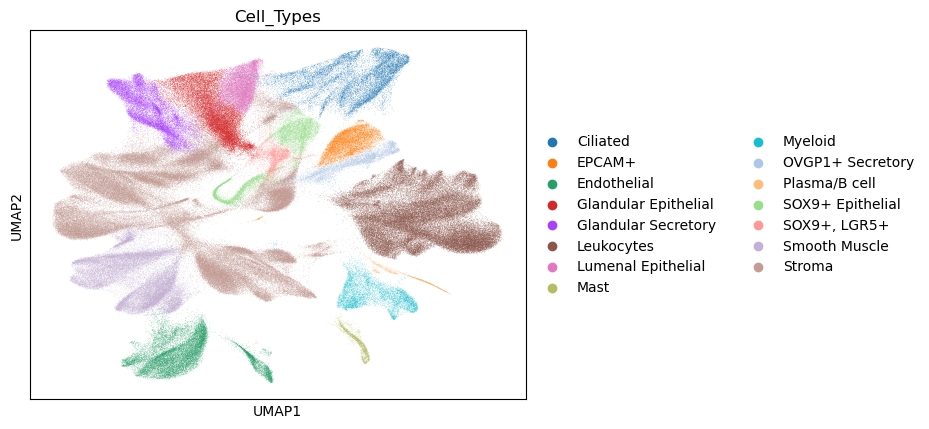

In [3]:
sc.pl.umap(oviendo, color = 'Cell_Types')

In [4]:
## create new cell type labels, 
# column 'celltype_tissue', ='Cell_Types' + 'Tissue_type'

oviendo.obs['celltype_tissue'] = np.nan 

In [5]:
oviendo.obs['celltype_tissue'] = oviendo.obs['Cell_Types'].astype(str) + '-' + oviendo.obs['Tissue_type'].astype(str)

In [6]:
counts = oviendo.obs['celltype_tissue'].value_counts()

In [7]:
counts

Stroma-Uterine                         91411
Leukocytes-Fallopian Tube              57829
Stroma-Fallopian Tube                  34082
Smooth Muscle-Uterine                  27928
Glandular Epithelial-Uterine           24047
Glandular Secretory-Uterine            18162
Lumenal Epithelial-Uterine             13888
Endothelial-Uterine                    13607
SOX9+ Epithelial-Uterine               12457
Leukocytes-Uterine                     11441
Ciliated-Fallopian Tube                10024
EPCAM+-Fallopian Tube                   9563
Endothelial-Fallopian Tube              7801
Smooth Muscle-Fallopian Tube            7740
Ciliated-Uterine                        7098
OVGP1+ Secretory-Fallopian Tube         6143
Myeloid-Fallopian Tube                  5703
SOX9+, LGR5+-Uterine                    5152
Mast-Fallopian Tube                     2078
Myeloid-Uterine                         2057
Plasma/B cell-Fallopian Tube            1131
Plasma/B cell-Uterine                    341
EPCAM+-Ute

In [8]:
toremove=['SOX9+ Epithelial-Fallopian Tube','SOX9+, LGR5+-Fallopian Tube','Glandular Epithelial-Fallopian Tube','Glandular Secretory-Fallopian Tube','EPCAM+-Uterine','OVGP1+ Secretory-Uterine','EPCAM+-Fallopian Tube']

In [9]:
oviendo = oviendo[~oviendo.obs['celltype_tissue'].isin(toremove)]
                                                       

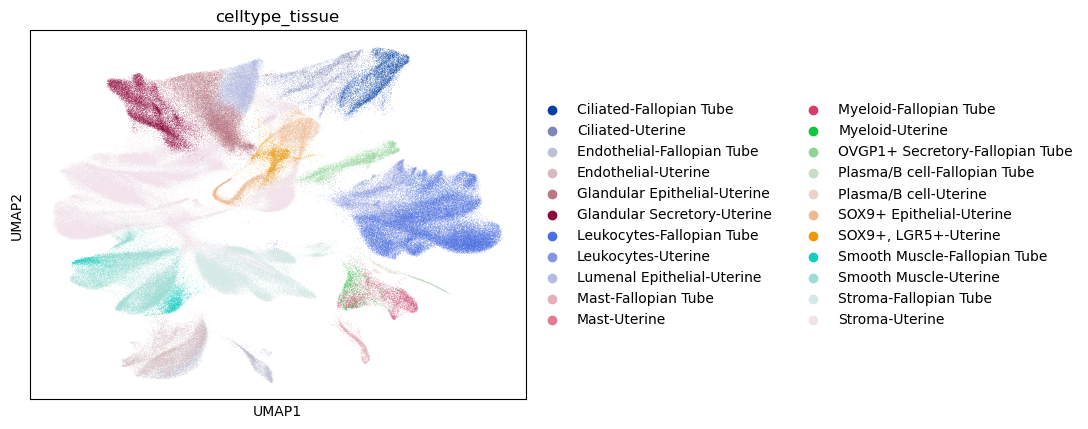

In [10]:
sc.pl.umap(oviendo, color = 'celltype_tissue')

In [11]:
#crop to secretory phase only
oviendo = oviendo[oviendo.obs['menstrual_status'].isin(['Secretory']),:].copy()


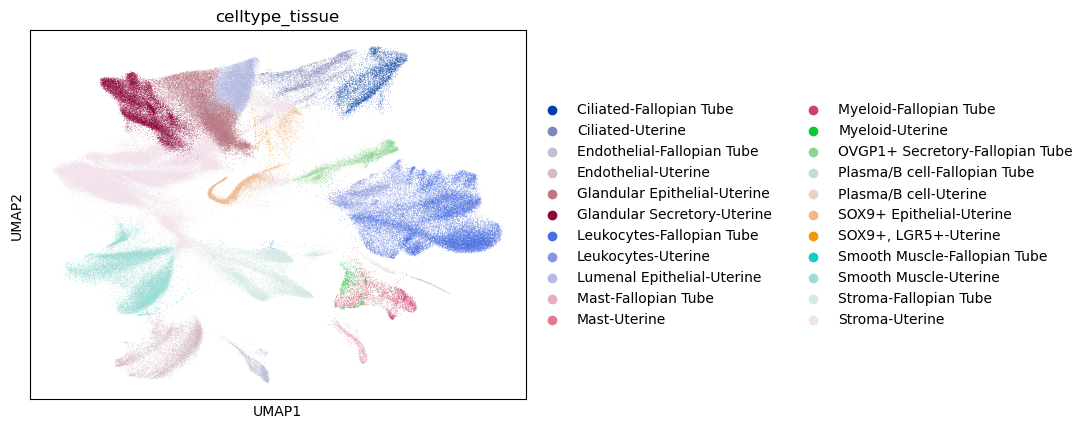

In [12]:
sc.pl.umap(oviendo, color = 'celltype_tissue')

In [13]:
#create new categories for DEG testing 
# secretory fallopian epithelium 
#secreotory endometrial epithelial 
    # subgroups of endometrial epithelium 
    
    
oviendo.obs['broadsecretorygroups']=np.nan 

broadgroupsdict = { 'Secretory Fallopian Tube' : ['OVGP1+ Secretory-Fallopian Tube'],
                   'Secretory Endometrial' : ['Glandular Epithelial-Uterine','Glandular Secretory-Uterine','Lumenal Epithelial-Uterine','SOX9+ Epithelial-Uterine']}

for i in broadgroupsdict.keys():
    ind = pd.Series(oviendo.obs.celltype_tissue).isin(broadgroupsdict[i])
    oviendo.obs.loc[ind,'broadsecretorygroups'] = i
                   
oviendo.obs['endometrialsecretorygroups']=np.nan 

endometrialgroupsdict = { 'Secretory Fallopian Tube' : ['OVGP1+ Secretory-Fallopian Tube'],
                   'Glandular Endometrial' : ['Glandular Epithelial-Uterine','Glandular Secretory-Uterine','SOX9+ Epithelial-Uterine'],
                    'Luminal Endometrial' : ['Lumenal Epithelial-Uterine'] }
for i in endometrialgroupsdict.keys():
    ind = pd.Series(oviendo.obs.celltype_tissue).isin(endometrialgroupsdict[i])
    oviendo.obs.loc[ind,'endometrialsecretorygroups'] = i
                   


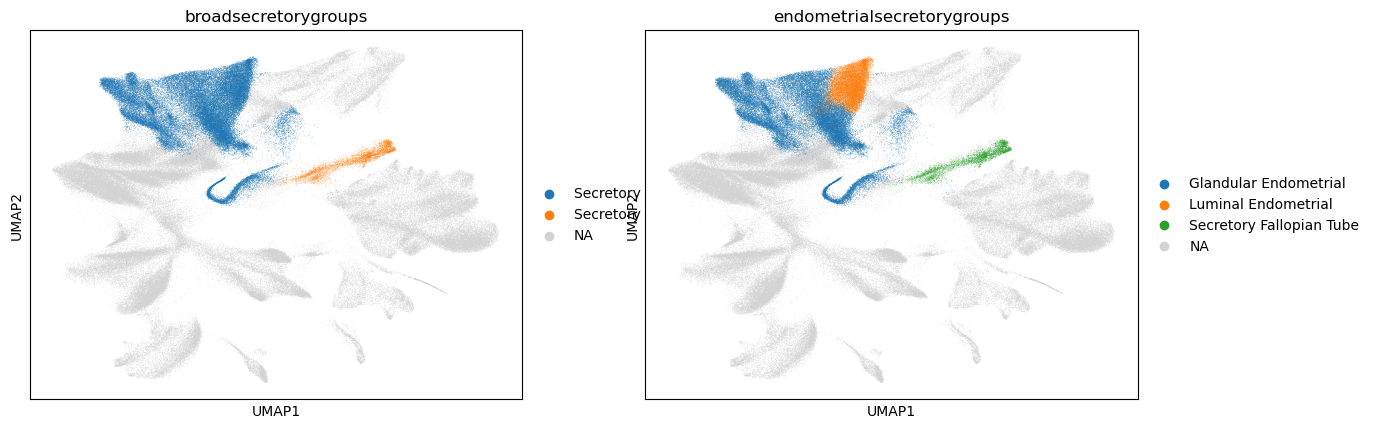

In [15]:
sc.pl.umap(oviendo, color=['broadsecretorygroups','endometrialsecretorygroups'])

In [ ]:
#create dfs for hypernetwork analysis 

In [27]:
glandularendo = oviendo[oviendo.obs['endometrialsecretorygroups'].isin(['Glandular Endometrial']),:].copy()

In [29]:
glandularendo = ad.AnnData.to_df(glandularendo)
glandularendo.to_csv(r'/home/j87832lw/mounting/oviduct/oviduct.all/glandularendojune.csv')

AttributeError: 'DataFrame' object has no attribute '_has_X'

In [30]:
lumenalendo = oviendo[oviendo.obs['endometrialsecretorygroups'].isin(['Luminal Endometrial']),:].copy()

In [31]:
lumenalendo = ad.AnnData.to_df(lumenalendo)
lumenalendo.to_csv(r'/home/j87832lw/mounting/oviduct/oviduct.all/lumenalendojune.csv')

In [32]:
secretoryFT = oviendo[oviendo.obs['endometrialsecretorygroups'].isin(['Secretory Fallopian Tube']),:].copy()

In [33]:
secretoryFT = ad.AnnData.to_df(secretoryFT)
secretoryFT.to_csv(r'/home/j87832lw/mounting/oviduct/oviduct.all/secretoryFTjune.csv')

In [ ]:
#testing two sets of DEGs 



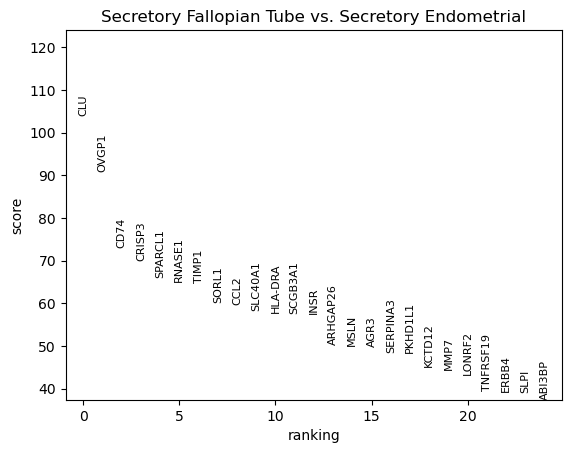

In [16]:
#initialy ft vs both types of endometrium

sc.pp.log1p(oviendo)
sc.tl.rank_genes_groups(oviendo, 'broadsecretorygroups', use_raw=False, groups=['Secretory Fallopian Tube'], reference='Secretory Endometrial', method='wilcoxon')
sc.pl.rank_genes_groups(oviendo, n_genes=25, sharey=False)

In [17]:
gene_names = oviendo.uns['rank_genes_groups']['names'].tolist()

broadDEGs = [gene for sublist in gene_names for gene in sublist]

broadDEGs=broadDEGs[0:600]

In [18]:
#write a txt file of DEGs
with open(r'/home/j87832lw/mounting/oviduct/oviduct.all/broadDEGsjun.txt', 'w') as fp:
    for item in broadDEGs:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


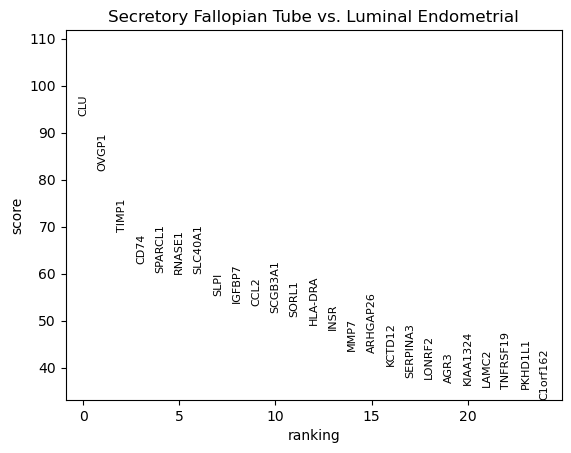

In [19]:
# fallopian tube vs luminal endometrium
sc.tl.rank_genes_groups(oviendo, 'endometrialsecretorygroups', use_raw=False, groups=['Secretory Fallopian Tube'], reference='Luminal Endometrial', method='wilcoxon')
sc.pl.rank_genes_groups(oviendo, n_genes=25, sharey=False)

In [20]:
gene_names = oviendo.uns['rank_genes_groups']['names'].tolist()

luminalDEGs = [gene for sublist in gene_names for gene in sublist]

luminalDEGs=luminalDEGs[0:500]

In [21]:
#write a txt file of DEGs
with open(r'/home/j87832lw/mounting/oviduct/oviduct.all/luminalDEGsjun.txt', 'w') as fp:
    for item in luminalDEGs:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


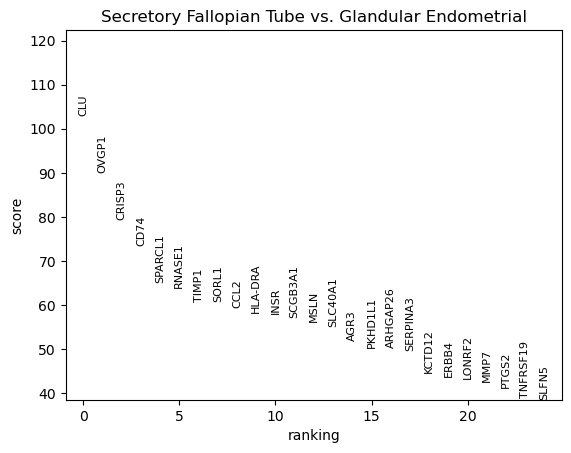

In [22]:
# fallopian tube vs glandular endometrium
sc.tl.rank_genes_groups(oviendo, 'endometrialsecretorygroups', use_raw=False, groups=['Secretory Fallopian Tube'], reference='Glandular Endometrial', method='wilcoxon')
sc.pl.rank_genes_groups(oviendo, n_genes=25, sharey=False)

In [23]:
gene_names = oviendo.uns['rank_genes_groups']['names'].tolist()

glandularDEGs = [gene for sublist in gene_names for gene in sublist]

glandularDEGs=glandularDEGs[0:500]

In [24]:
#write a txt file of DEGs
with open(r'/home/j87832lw/mounting/oviduct/oviduct.all/glandularDEGsjun.txt', 'w') as fp:
    for item in glandularDEGs:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [14]:
gwasgenes = ['ANKRD36','ANKRD36B','CLDN1','CLGN','GLS','HEMK1','HLA-DQB1','HLA-DRB1','HLA-DRB5','INTU','MDN1',
'MUC1','NR2F1','PCNX2','PEX6','PGGHG','PLXNA4','RABL2B','SKIV2L','SLC7A2','UBA7','ZNF266']

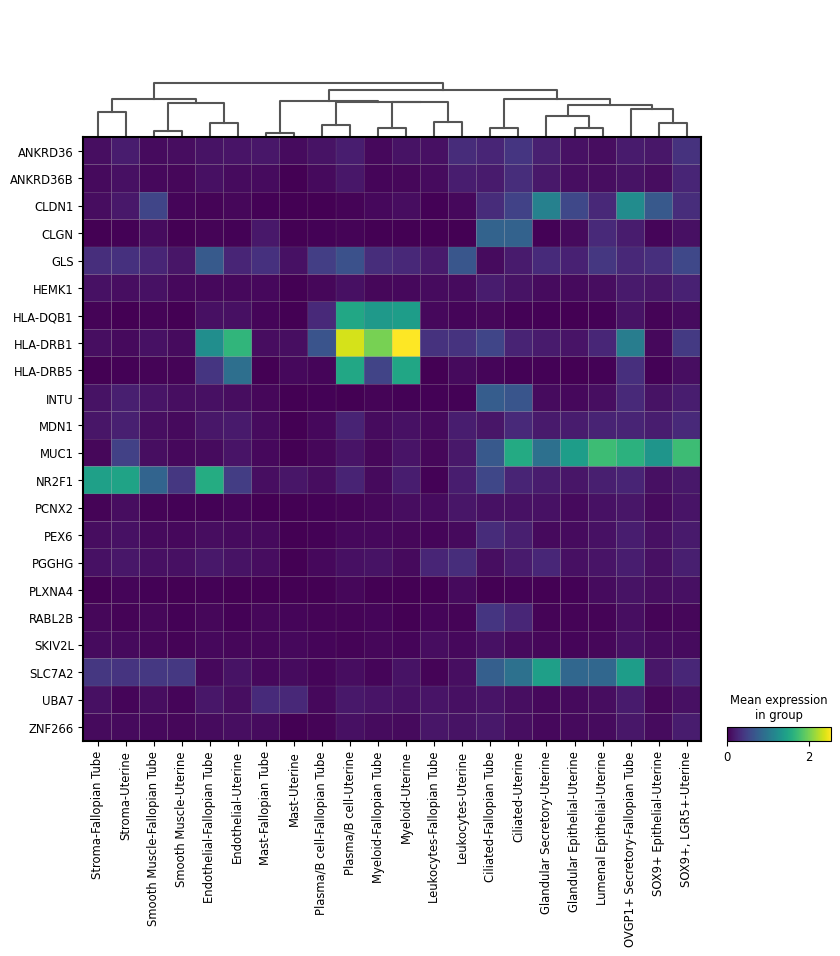

In [15]:
sc.tl.dendrogram(oviendo, groupby='celltype_tissue')
sc.pl.matrixplot(oviendo, gwasgenes, groupby='celltype_tissue', swap_axes=True, dendrogram=True, vcenter=0.7)
